Add the package to the path.

In [1]:
import sys
sys.path.append("C:/Users/A.C.EA/OneDrive/Documents/GitHub/QICKIT")

Import `qickit` modules. For this demo, we will import the circuit instances and backend instances.

In [2]:
from qickit.circuit import QiskitCircuit, PennylaneCircuit, CirqCircuit, TKETCircuit
from qickit.backend import AerBackend, NoisyAerBackend

### Circuits Demo : Running quantum circuits

This notebook is dedicated to the demonstration of how `qickit` can be used to run gate-based quantum circuits. Quantum circuits can be run on three paradigms:
1) Simulation Backends : Ideal simulators which can be used to get the statevector, operator, or counts of a circuit without any errors/noise.
2) Noisy Simulation Backends : Simulators which can emulate realistic noise to simulate the behavior of actual quantum hardware.
3) Quantum hardware : Actual quantum hardware which can be used to run quantum circuits and can only return the counts with some degree of noise.

In this notebook, we will go over some of these backends and how `qickit` allows any supported framework to be run on any supported backend.

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


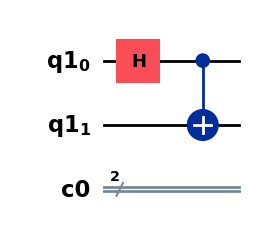

In [3]:
# Create a circuit
test_qc = QiskitCircuit(2, 2)

# Apply a Hadamard gate to qubit 0
test_qc.H(0)
# Apply a CX gate to qubit 1 controlled by 0
test_qc.CX(0, 1)

# Draw the circuit
test_qc.draw()

For development purposes, we mostly can use simulators as actual hardware is hard to access. However, for any application to be useful, we need to be able to have some degree of confidence that it will work adequately well on the desired hardware. This is where simulators are best utilized.

We can use `AerBackend` to perform ideal simulation using Qiskit Aer's Backend, or use `NoisyAerBackend` to define a simple noisy simulator.

In [4]:
# Define the `qickit.backend.AerBackend`
aer_backend = AerBackend()

# Get the counts of the circuit
counts = aer_backend.get_counts(circuit=test_qc, num_shots=1024)

# Get the statevector of the circuit
statevector = aer_backend.get_statevector(test_qc)

# Get the unitary of the circuit
unitary = aer_backend.get_operator(test_qc)

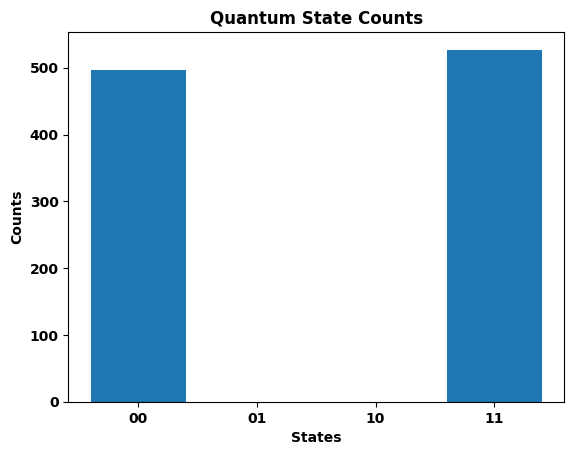

In [6]:
import matplotlib.pyplot as plt

plt.bar(counts.keys(), counts.values())
plt.xlabel('States')
plt.ylabel('Counts')
plt.title('Quantum State Counts')
plt.show()

To define noisy simulators we need to define the error expected for one qubit and two qubit gates. You can create custom simulators where you can add custom error for specific gates, specific topologies, etc. `NoisyAerBackend` will provide a simple way of doing noisy simulation.

In [7]:
# Define the `qickit.backend.NoisyAerBackend`
noisy_aer_backend = NoisyAerBackend(0.05, 0.1)

# Get the counts of the circuit
counts = noisy_aer_backend.get_counts(circuit=test_qc, num_shots=1024)

# Get the statevector of the circuit
statevector = noisy_aer_backend.get_statevector(test_qc)

# Get the unitary of the circuit
unitary = noisy_aer_backend.get_operator(test_qc)

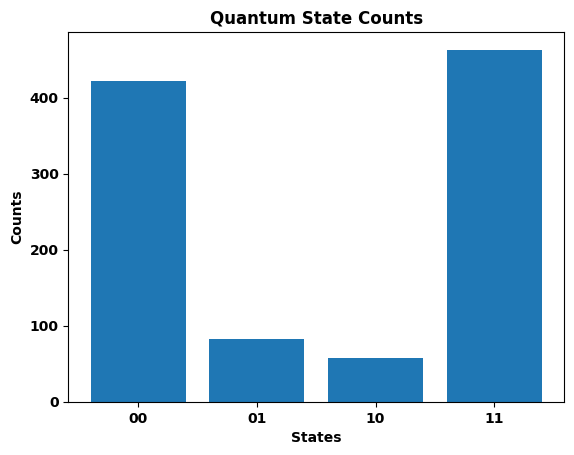

In [8]:
plt.bar(counts.keys(), counts.values())
plt.xlabel('States')
plt.ylabel('Counts')
plt.title('Quantum State Counts')
plt.show()

You can also access the backends through the `Circuit` instances.

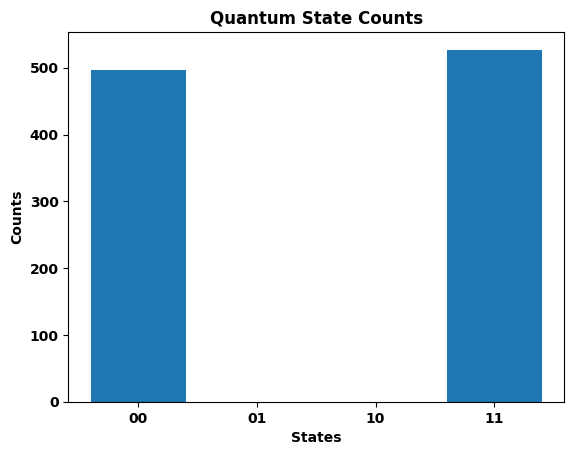

In [9]:
counts = test_qc.get_counts(1024, aer_backend)

plt.bar(counts.keys(), counts.values())
plt.xlabel('States')
plt.ylabel('Counts')
plt.title('Quantum State Counts')
plt.show()

With `qickit`'s translation mechanism, you can also access the backends through the other `Circuit` instances. The way this works is that if the backend is not native to the framework passed, then it will first translate the circuit and then run the corresponding function.

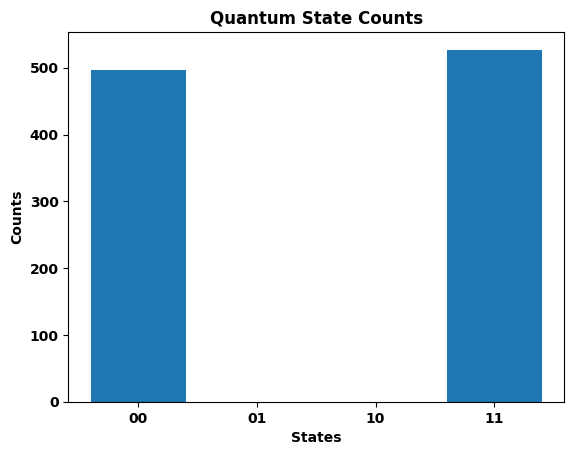

In [10]:
# Define a `TKETCircuit` instance with Bell state
tket_circuit = TKETCircuit(2, 2)

tket_circuit.H(0)
tket_circuit.CX(0, 1)

counts = tket_circuit.get_counts(1024, aer_backend)

plt.bar(counts.keys(), counts.values())
plt.xlabel('States')
plt.ylabel('Counts')
plt.title('Quantum State Counts')
plt.show()

<p>© 2024 Qualition Computing, all rights reserved.</p>